<a href="https://colab.research.google.com/github/riskintellab/AlphaLab/blob/main/ideation/01_intraday_returns_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
#import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Download and prepare the data

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the stock symbol and time interval
stock_symbol = 'SOXL'  # Replace with your desired stock symbol
interval = '5m'

# Calculate the start and end dates
today = datetime.today().strftime('%Y-%m-%d')
daysback_recent = 59
daysback_remote = 150
recent_past = (datetime.today() - timedelta(days=daysback_recent)).strftime('%Y-%m-%d')
#remote_past = (datetime.today() - timedelta(days=daysback_remote)).strftime('%Y-%m-%d')

# Download historical data from three months ago until today
data = yf.download(stock_symbol, start=recent_past, end=today, interval=interval)
#data = yf.download(stock_symbol, start=remote_past, end=recent_past, interval=interval)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-08 09:30:00-04:00,14.4600,14.5799,14.400,14.4300,14.4300,3892609
2023-05-08 09:35:00-04:00,14.4250,14.4400,14.260,14.3000,14.3000,1295532
2023-05-08 09:40:00-04:00,14.3000,14.3500,14.180,14.2729,14.2729,1391055
2023-05-08 09:45:00-04:00,14.2729,14.3000,14.120,14.1400,14.1400,1016338
2023-05-08 09:50:00-04:00,14.1499,14.1800,14.100,14.1291,14.1291,894207
2023-05-08 09:55:00-04:00,14.1264,14.1700,14.070,14.1350,14.1350,879280
2023-05-08 10:00:00-04:00,14.1310,14.2400,14.105,14.1800,14.1800,985748
2023-05-08 10:05:00-04:00,14.1900,14.2700,14.160,14.1901,14.1901,604168
2023-05-08 10:10:00-04:00,14.2390,14.2500,14.170,14.2250,14.2250,451356


In [ ]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-05 15:10:00-04:00,24.108999,24.190001,24.080000,24.190001,24.190001,187323
2023-07-05 15:15:00-04:00,24.195000,24.219900,24.150000,24.165001,24.165001,211731
2023-07-05 15:20:00-04:00,24.165001,24.174999,24.110001,24.135700,24.135700,199161
2023-07-05 15:25:00-04:00,24.137699,24.209101,24.137699,24.209101,24.209101,264955
2023-07-05 15:30:00-04:00,24.209999,24.270000,24.209600,24.229900,24.229900,353320
2023-07-05 15:35:00-04:00,24.230000,24.270000,24.180000,24.190001,24.190001,232157
2023-07-05 15:40:00-04:00,24.180000,24.225000,24.110001,24.115000,24.115000,292765
2023-07-05 15:45:00-04:00,24.110001,24.145800,24.070000,24.139999,24.139999,412417
2023-07-05 15:50:00-04:00,24.139999,24.139999,23.900000,23.910000,23.910000,878441


In [ ]:
daily_data = data.groupby(data.index.date).last()

In [ ]:
old_columns = daily_data.columns.tolist()
new_column_names = [ 'close_of_day_' + c for c in old_columns]
old_new_columns_dict = { old:new for old, new in zip(old_columns,new_column_names )}
daily_data.rename( columns = old_new_columns_dict, inplace=True)

In [ ]:
old_new_columns_dict

{'Open': 'close_of_day_Open',
 'High': 'close_of_day_High',
 'Low': 'close_of_day_Low',
 'Close': 'close_of_day_Close',
 'Adj Close': 'close_of_day_Adj Close',
 'Volume': 'close_of_day_Volume'}

In [ ]:
daily_data

,close_of_day_Open,close_of_day_High,close_of_day_Low,close_of_day_Close,close_of_day_Adj Close,close_of_day_Volume
2023-05-08,14.660000,14.670000,14.630100,14.665000,14.665000,685020
2023-05-09,13.930000,13.970000,13.900000,13.915000,13.915000,1227673
2023-05-10,14.380000,14.385000,14.310000,14.320000,14.320000,1025918
2023-05-11,14.010100,14.080000,14.002200,14.050000,14.050000,1177762
2023-05-12,13.980000,14.019900,13.980000,14.005000,14.005000,1303932
2023-05-15,15.110000,15.140000,15.084500,15.130000,15.130000,2207087
2023-05-16,15.080000,15.080000,15.020000,15.040000,15.040000,1300566
2023-05-17,16.180000,16.230000,16.129999,16.169701,16.169701,1646379
2023-05-18,17.700001,17.740000,17.670000,17.680000,17.680000,1882358
2023-05-19,17.410000,17.434999,17.365000,17.370001,17.370001,769309


In [ ]:
prior_day_daily_data = daily_data.shift(1)

In [ ]:
prior_day_daily_data.head()

,close_of_day_Open,close_of_day_High,close_of_day_Low,close_of_day_Close,close_of_day_Adj Close,close_of_day_Volume
2023-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-09,14.6600,14.670,14.6301,14.665,14.665,685020.0
2023-05-10,13.9300,13.970,13.9000,13.915,13.915,1227673.0
2023-05-11,14.3800,14.385,14.3100,14.320,14.320,1025918.0
2023-05-12,14.0101,14.080,14.0022,14.050,14.050,1177762.0


In [ ]:
#pd.merge(data, daily_data, how='left', left_on=data.index.date, right_index=True)

In [ ]:
# Merge the grouped data back into the original DataFrame
combined_data = pd.merge(data, prior_day_daily_data, how='left', left_on=data.index.date, right_index=True)
combined_data.dropna(inplace=True)

In [ ]:
combined_data

,Open,High,Low,Close,Adj Close,Volume,close_of_day_Open,close_of_day_High,close_of_day_Low,close_of_day_Close,close_of_day_Adj Close,close_of_day_Volume
Datetime,,,,,,,,,,,,
2023-05-09 09:30:00-04:00,14.040100,14.120000,13.850000,13.865000,13.865000,5313264,14.66,14.670000,14.6301,14.665000,14.665000,685020.0
2023-05-09 09:35:00-04:00,13.865000,13.980000,13.830000,13.950000,13.950000,2224707,14.66,14.670000,14.6301,14.665000,14.665000,685020.0
2023-05-09 09:40:00-04:00,13.950000,13.960000,13.870000,13.930000,13.930000,1362244,14.66,14.670000,14.6301,14.665000,14.665000,685020.0
2023-05-09 09:45:00-04:00,13.930000,14.020000,13.925000,13.950100,13.950100,2627914,14.66,14.670000,14.6301,14.665000,14.665000,685020.0
2023-05-09 09:50:00-04:00,13.950100,13.975000,13.880000,13.935000,13.935000,2040884,14.66,14.670000,14.6301,14.665000,14.665000,685020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05 15:35:00-04:00,24.230000,24.270000,24.180000,24.190001,24.190001,232157,25.18,25.209999,25.1800,25.189899,25.189899,178614.0
2023-07-05 15:40:00-04:00,24.180000,24.225000,24.110001,24.115000,24.115000,292765,25.18,25.209999,25.1800,25.189899,25.189899,178614.0
2023-07-05 15:45:00-04:00,24.110001,24.145800,24.070000,24.139999,24.139999,412417,25.18,25.209999,25.1800,25.189899,25.189899,178614.0


In [ ]:
combined_data.loc[combined_data.index.date == combined_data.index.date[2]][['Adj Close', 'close_of_day_Adj Close']]

,Adj Close,close_of_day_Adj Close
Datetime,,
2023-05-09 09:30:00-04:00,13.8650,14.665
2023-05-09 09:35:00-04:00,13.9500,14.665
2023-05-09 09:40:00-04:00,13.9300,14.665
2023-05-09 09:45:00-04:00,13.9501,14.665
2023-05-09 09:50:00-04:00,13.9350,14.665
...,...,...
2023-05-09 15:35:00-04:00,13.8300,14.665
2023-05-09 15:40:00-04:00,13.8126,14.665
2023-05-09 15:45:00-04:00,13.9144,14.665


In [ ]:
data_close = combined_data[['Adj Close', 'close_of_day_Adj Close']]
data_close['intraday_returns'] = (data_close['Adj Close'] - data_close['close_of_day_Adj Close']) / data_close['close_of_day_Adj Close']

<ipython-input-101-aaf90b92fc29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_close['intraday_returns'] = (data_close['Adj Close'] - data_close['close_of_day_Adj Close']) / data_close['close_of_day_Adj Close']


In [ ]:
data_close.head()

,Adj Close,close_of_day_Adj Close,intraday_returns
Datetime,,,
2023-05-09 09:30:00-04:00,13.8650,14.665,-0.054552
2023-05-09 09:35:00-04:00,13.9500,14.665,-0.048756
2023-05-09 09:40:00-04:00,13.9300,14.665,-0.050119
2023-05-09 09:45:00-04:00,13.9501,14.665,-0.048749
2023-05-09 09:50:00-04:00,13.9350,14.665,-0.049778


<Axes: xlabel='Datetime'>

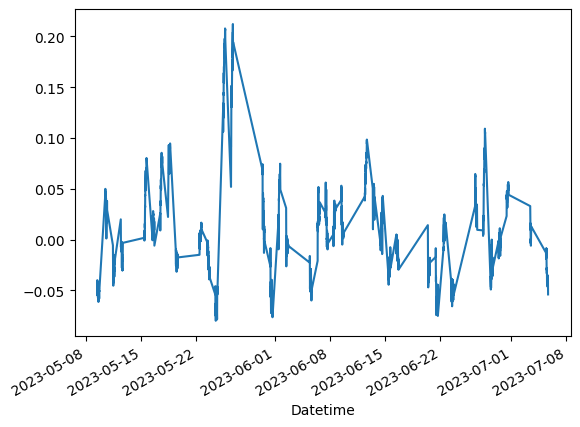

In [ ]:
data_close['intraday_returns'].plot()

### Identify daily percentiles of Intra day returns

In [ ]:
low_qtl = 0.15
up_qtl = 0.85

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).quantile(low_qtl).mean() * 100

-0.27268875093233647

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).quantile(up_qtl).mean() * 100

2.460778193016672

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).quantile(low_qtl).median() * 100

-0.09851451521403837

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).quantile(up_qtl).mean() * 100

2.460778193016672

### Identify Quantiles daily minimum and mamximum of Intraday Returns

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).min().quantile(low_qtl) * 100

-5.577786554429495

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).max().quantile(up_qtl) * 100

8.186158240728918

### Identify Quantiles daily minimum and mamximum of Intraday Returns

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).min().mean() * 100

-1.7344007040576506

In [ ]:
data_close['intraday_returns'].groupby(data_close.index.date).max().mean() * 100

3.845239366701593

### Time during which the minimum intrady return occurs

In [ ]:
def display_min_time(data):
  daily_data = data['intraday_returns'].groupby(data.index.date).min()
  min_times = data.groupby(data.index.date)['intraday_returns'].idxmin()

In [ ]:
daily_min_max = data_close.groupby(data_close.index.date).agg({'intraday_returns': ['idxmin', 'min', 'idxmax', 'max']})
daily_min_max

intraday_returns                                      \
                              idxmin       min                    idxmax   
2023-05-18 2023-05-18 09:30:00-04:00  0.022282 2023-05-18 15:50:00-04:00   
2023-05-19 2023-05-19 11:35:00-04:00 -0.031674 2023-05-19 09:40:00-04:00   
2023-05-22 2023-05-22 09:30:00-04:00 -0.014968 2023-05-22 14:50:00-04:00   
2023-05-23 2023-05-23 14:35:00-04:00 -0.039122 2023-05-23 10:05:00-04:00   
2023-05-24 2023-05-24 11:00:00-04:00 -0.079905 2023-05-24 09:35:00-04:00   
2023-05-25 2023-05-25 09:35:00-04:00  0.106117 2023-05-25 15:20:00-04:00   
2023-05-26 2023-05-26 09:30:00-04:00  0.051877 2023-05-26 15:10:00-04:00   
2023-05-30 2023-05-30 14:00:00-04:00 -0.013095 2023-05-30 09:45:00-04:00   
2023-05-31 2023-05-31 15:55:00-04:00 -0.076118 2023-05-31 09:35:00-04:00   
2023-06-01 2023-06-01 10:20:00-04:00 -0.009507 2023-06-01 15:15:00-04:00   
2023-06-02 2023-06-02 10:05:00-04:00 -0.026339 2023-06-02 09:30:00-04:00   
2023-06-05 2023-06-05 14:35:00-04:00 -0.059959 2023-06-05 09:40:00-04:00   
2023-06-06 2023-06-06 09:30:00-04:00 -0.021460 2023-06-06 12:00:00-04:00   
2023-06-07 2023-06-07 15:45:00-04:00 -0.009668 2023-06-07 10:10:00-04:00   
2023-06-08 2023-06-08 09:50:00-04:00 -0.006472 2023-06-08 12:25:00-04:00   
2023-06-09 2023-06-09 12:35:00-04:00 -0.004942 2023-06-09 09:50:00-04:00   
2023-06-12 2023-06-12 09:35:00-04:00  0.038474 2023-06-12 15:35:00-04:00   
2023-06-13 2023-06-13 10:10:00-04:00  0.010158 2023-06-13 13:00:00-04:00   
2023-06-14 2023-06-14 14:15:00-04:00 -0.014266 2023-06-14 15:55:00-04:00   
2023-06-15 2023-06-15 09:55:00-04:00 -0.044443 2023-06-15 14:55:00-04:00   
2023-06-16 2023-06-16 15:55:00-04:00 -0.029669 2023-06-16 09:30:00-04:00   
2023-06-20 2023-06-20 10:35:00-04:00 -0.047061 2023-06-20 09:30:00-04:00   
2023-06-21 2023-06-21 15:55:00-04:00 -0.075139 2023-06-21 09:35:00-04:00   
2023-06-22 2023-06-22 09:35:00-04:00 -0.010545 2023-06-22 11:45:00-04:00   
2023-06-23 2023-06-23 11:25:00-04:00 -0.065669 2023-06-23 10:15:00-04:00   
2023-06-26 2023-06-26 15:55:00-04:00  0.009607 2023-06-26 09:55:00-04:00   
2023-06-27 2023-06-27 09:45:00-04:00  0.003625 2023-06-27 15:25:00-04:00   
2023-06-28 2023-06-28 09:30:00-04:00 -0.049160 2023-06-28 12:15:00-04:00   
2023-06-29 2023-06-29 09:40:00-04:00 -0.018526 2023-06-29 12:45:00-04:00   
2023-06-30 2023-06-30 09:30:00-04:00  0.023098 2023-06-30 14:35:00-04:00   
2023-07-03 2023-07-03 11:35:00-04:00 -0.006031 2023-07-03 09:30:00-04:00   
2023-07-05 2023-07-05 15:55:00-04:00 -0.053986 2023-07-05 10:15:00-04:00   

                      
                 max  
2023-05-18  0.094646  
2023-05-19 -0.009729  
2023-05-22  0.016695  
2023-05-23 -0.000855  
2023-05-24 -0.045872  
2023-05-25  0.207859  
2023-05-26  0.212200  
2023-05-30  0.074203  
2023-05-31 -0.007930  
2023-06-01  0.074806  
2023-06-02  0.031106  
2023-06-05 -0.016125  
2023-06-06  0.051288  
2023-06-07  0.056169  
2023-06-08  0.038373  
2023-06-09  0.053047  
2023-06-12  0.098472  
2023-06-13  0.054856  
2023-06-14  0.043033  
2023-06-15 -0.007502  
2023-06-16  0.005014  
2023-06-20  0.014098  
2023-06-21 -0.008485  
2023-06-22  0.024780  
2023-06-23 -0.038703  
2023-06-26  0.064616  
2023-06-27  0.109194  
2023-06-28  0.000004  
2023-06-29  0.011158  
2023-06-30  0.056679  
2023-07-03  0.032971  
2023-07-05 -0.008730

In [ ]:
daily_min_max.rename(columns={'idxmin':'time_at_minimum', 'min':'minimum', 'idxmax':'time_at_maximum', 'max':'maximum'}, inplace=True)
daily_min_max = daily_min_max['intraday_returns']

In [ ]:
daily_min_max['time_at_minimum']

2023-05-18   2023-05-18 09:30:00-04:00
2023-05-19   2023-05-19 11:35:00-04:00
2023-05-22   2023-05-22 09:30:00-04:00
2023-05-23   2023-05-23 14:35:00-04:00
2023-05-24   2023-05-24 11:00:00-04:00
2023-05-25   2023-05-25 09:35:00-04:00
2023-05-26   2023-05-26 09:30:00-04:00
2023-05-30   2023-05-30 14:00:00-04:00
2023-05-31   2023-05-31 15:55:00-04:00
2023-06-01   2023-06-01 10:20:00-04:00
2023-06-02   2023-06-02 10:05:00-04:00
2023-06-05   2023-06-05 14:35:00-04:00
2023-06-06   2023-06-06 09:30:00-04:00
2023-06-07   2023-06-07 15:45:00-04:00
2023-06-08   2023-06-08 09:50:00-04:00
2023-06-09   2023-06-09 12:35:00-04:00
2023-06-12   2023-06-12 09:35:00-04:00
2023-06-13   2023-06-13 10:10:00-04:00
2023-06-14   2023-06-14 14:15:00-04:00
2023-06-15   2023-06-15 09:55:00-04:00
2023-06-16   2023-06-16 15:55:00-04:00
2023-06-20   2023-06-20 10:35:00-04:00
2023-06-21   2023-06-21 15:55:00-04:00
2023-06-22   2023-06-22 09:35:00-04:00
2023-06-23   2023-06-23 11:25:00-04:00
2023-06-26   2023-06-26 1

In [ ]:
daily_min_max.reset_index().columns

Index(['index', 'time_at_minimum', 'minimum', 'time_at_maximum', 'maximum'], dtype='object')

### On Compute the Minimum and Maxium on positive  days